# Import librairies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("./datas"))
import warnings
import json
warnings.filterwarnings("ignore")

['matches', 'players_info.csv']


# Players
## Player infos

In [22]:
data = pd.read_csv('./datas/players_info.csv')
data

,player_id,team,hours_played,best_rank_achieved,rank_season_9,dominant_hand
0,0,amateurs,336,gold,gold,right
1,1,amateurs,1200,gold,gold,right
2,2,amateurs,1000,platinum,platinum,right
3,3,amateurs,400,no_rank,no_rank,right
4,4,amateurs,415,gold,gold,right
5,0,pros,5000,diamond,diamond,left
6,1,pros,6000,diamond,diamond,right
7,2,pros,5000,diamond,diamond,right
8,3,pros,10000,master,master,right
9,4,pros,7000,diamond,diamond,right


Here, we have several important data.

First, the rank of the players is important because it will change their perception of the game and maybe also their vital signs.
Moreover, the hours played are also very important, the more a player have played the game, the more you will espect him to be used to the game and have less reactions in general.

# Matchs
## Matchs infos
First, we display a raw view of all matchs :

In [4]:
matchNumber = 22

matchs = []

for i in range(0, matchNumber):
    matchs.append(json.load(open('./datas/matches/match_' + str(i) + '/meta_info.json')))

for match in matchs:
    print(match)
    print()

{'match_duration': 957, 'season_id': 13, 'game_version': '9.22.296.5720', 'real_opponents': 0, 'communication': 1, 'team': 'amateurs', 'day_num': 0, 'day_match_num': 0}

{'match_duration': 1532, 'season_id': 13, 'game_version': '9.22.296.5720', 'real_opponents': 1, 'communication': 1, 'team': 'amateurs', 'day_num': 0, 'day_match_num': 1}

{'match_duration': 1072, 'season_id': 13, 'game_version': '9.22.296.5720', 'real_opponents': 0, 'communication': 0, 'team': 'amateurs', 'day_num': 0, 'day_match_num': 2}

{'match_duration': 1592, 'season_id': 13, 'game_version': '9.22.296.5720', 'real_opponents': 1, 'communication': 0, 'team': 'amateurs', 'day_num': 0, 'day_match_num': 3}

{'match_duration': 860, 'season_id': 13, 'game_version': '9.23.298.8833', 'real_opponents': 0, 'communication': 1, 'team': 'pros', 'day_num': 0, 'day_match_num': 0}

{'match_duration': 1006, 'season_id': 13, 'game_version': '9.23.298.8833', 'real_opponents': 1, 'communication': 1, 'team': 'pros', 'day_num': 0, 'day_

<AxesSubplot:>

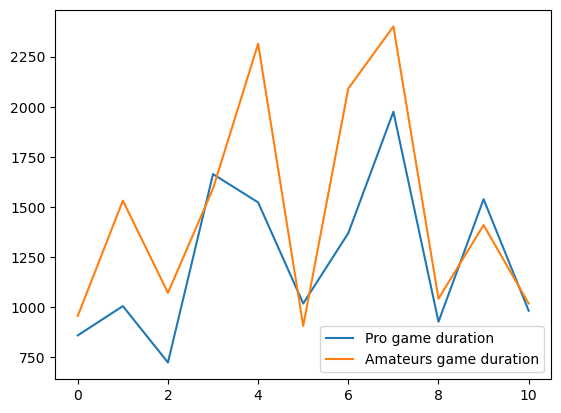

In [5]:
produrations = []
amateursdurations = []

for match in matchs:
    if (match['team'] == 'pros'):
        produrations.append(match['match_duration'])
    else:
        amateursdurations.append(match['match_duration'])
    
s = pd.DataFrame({"Pro game duration" : produrations, "Amateurs game duration" : amateursdurations})
s.plot.line()

Game duration can be important regarding the following data. Players can sweat more, be more tired...

From a general perspective, Amateurs games are longer than pro ones (they tend to finish it faster) so we need to keep this in mind for later purposes

## Match replay

In order to analyse changings in the sensor values later on, we will probably need some match data.

We have everything we need in the documents `replay.json` in each match folders. This file gives us data on events during the game, overview of the results and performances of the players.

In [23]:
data = json.load(open('./datas/matches/match_0/replay.json'))
participants = []
for row in data:
    if row != "teams" and row != "events":
        participants_row = {}
        participants_row['Champion ID'] = data[row]['championId']
        participants_row['WIN / LOOSE'] = 'WIN' if data[row]['stats']['win'] else 'LOOSE'
        participants_row['Kills'] = data[row]['stats']['kills']
        participants_row['Deaths'] = data[row]['stats']['deaths']
        participants_row['Assists'] = data[row]['stats']['assists']
        participants_row['Damages Dealt'] = data[row]['stats']['totalDamageDealt']
        participants_row['Gold Earned'] = data[row]['stats']['goldEarned']
        participants_row['Level'] = data[row]['stats']['champLevel']
        participants_row['Minions Killed'] = data[row]['stats']['totalMinionsKilled']
        participants.append(participants_row)
        
df = pd.DataFrame(participants)
df

,Champion ID,WIN / LOOSE,Kills,Deaths,Assists,Damages Dealt,Gold Earned,Level,Minions Killed
0,24,WIN,15,2,6,52238,9222,11,82
1,51,WIN,5,2,9,56459,6927,9,80
2,84,WIN,12,0,12,83089,8833,12,114
3,40,WIN,1,0,15,19336,5656,9,17
4,59,WIN,8,0,13,66504,7417,11,24
5,86,LOOSE,0,6,0,21568,3040,9,38
6,13,LOOSE,1,11,2,20319,3755,9,33
7,62,LOOSE,0,8,1,18131,3184,8,39
8,18,LOOSE,0,8,1,16017,3150,9,45
9,89,LOOSE,3,8,1,15865,4505,9,21


Some of the data retrieved will allow us to determine if the player is doing a good game, if he looses, he may have different data than if he wins...

But some other data in this file will let us know more about what's happening in the game with some events that corresponds to timestamps.

## Player reports

With that, we can also analyse some informations about the player (what role he played, if he had a disturbance with the sensors system...)

That data can be used in addition to others in order to get the feeling of the player during the game.

In [47]:
data = []
for matchnum in range(22):
    for playernum in range(5):
        path_to_file = './datas/matches/match_' + str(matchnum) + '/player_' + str(playernum) + "/player_report.json"
        if (exists(path_to_file)):
            data.append(json.load(open(path_to_file)))
            
df = pd.DataFrame(data)
df

,role,performance_evaluation,performance_evaluation_teammates,mental_load,sensing_system_disturbance
0,top,4,4,1,no
1,adc,4,4,1,a little bit
2,mid,5,5,1,a little bit
3,support,5,5,1,a little bit
4,jungle,4,5,1,no
...,...,...,...,...,...
104,support,5,5,1,no
105,mid,4,4,1,a little bit
106,top,5,5,1,a little bit
107,adc,4,5,1,a little bit


## Game environment

It can be also relevent to analyse the environment of the game. Each game has dedicated data representing the environment around the player and can be displayed :

In [52]:
env = pd.read_csv("./datas/matches/match_0/environment.csv")
env

,time,env_temperature,env_pressure,altitude,env_humidity,env_co2
0,0.0,26.56,973.31,344.63,23.94,470
1,1.0,26.56,973.28,344.39,23.98,470
2,2.0,26.56,973.31,344.15,23.60,470
3,3.0,26.56,973.31,344.15,24.59,470
4,4.0,26.54,973.28,344.43,24.12,470
...,...,...,...,...,...,...
953,952.0,25.95,973.40,343.63,24.00,401
954,953.0,25.96,973.39,343.49,23.97,401
955,954.0,25.96,973.47,343.73,24.03,401
956,955.0,25.96,973.37,343.66,23.97,401


Some values may be more important than other, for example, the temperature of the environment can have an impact on later data : skin temperature.

Some may have less importance like the altitude (at least the evolution of it)

We can also plot some data :

<AxesSubplot:>

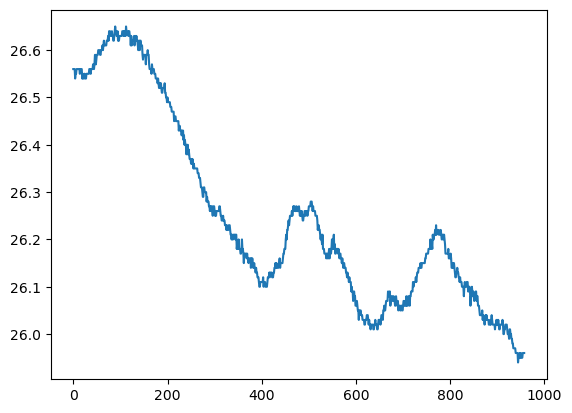

In [59]:
env["env_temperature"].plot.line()

For example, here, we have the time representation of the environment temperature. Data in itself is not so important (we just see the temperature dicreasing) but it can be corralated to other sensor data to get some conclusions.

# Sensor data
## Heart beat
In first, let's analyse the heart beat of different players in different games

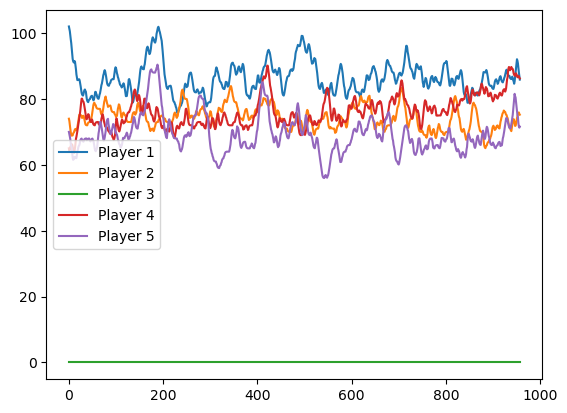

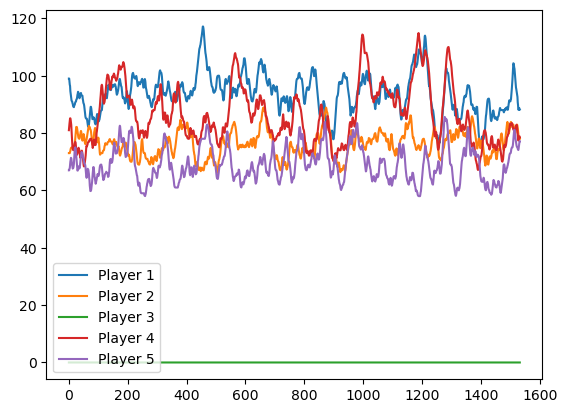

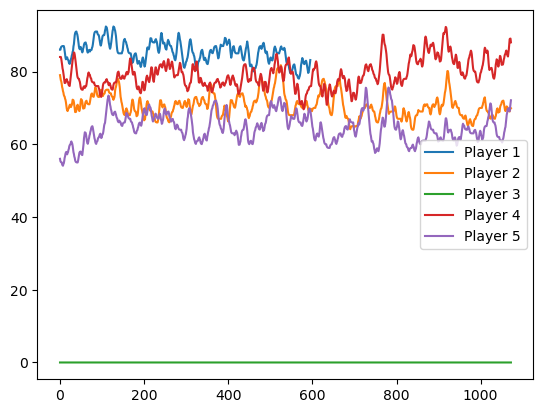

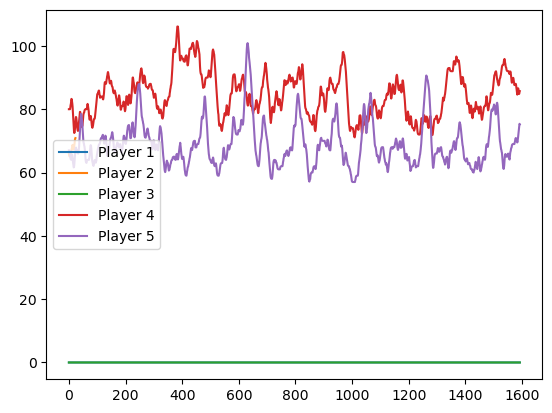

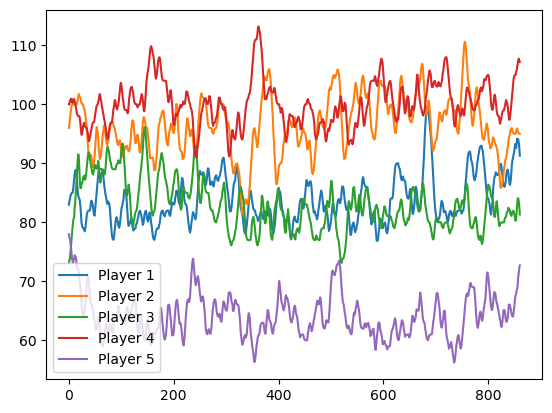

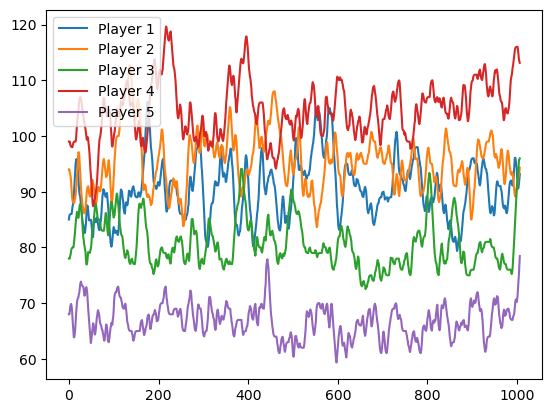

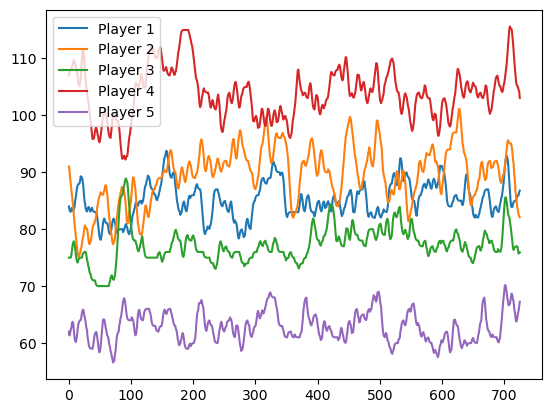

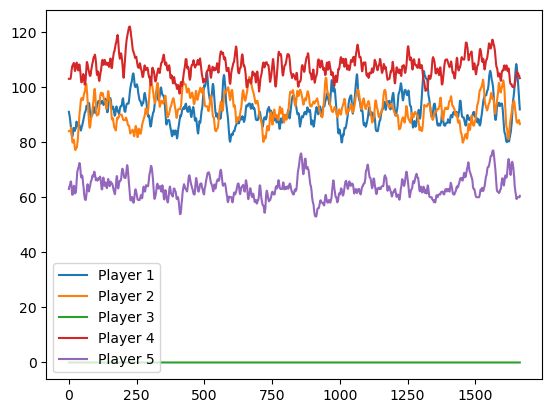

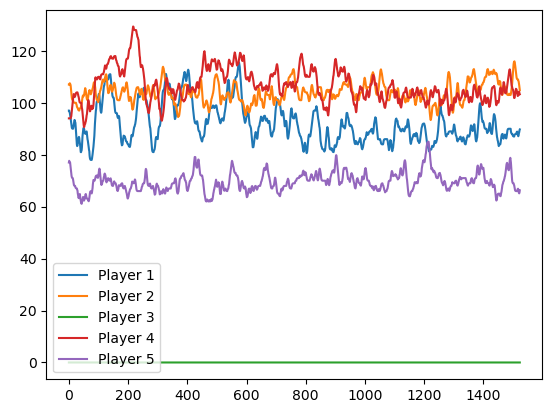

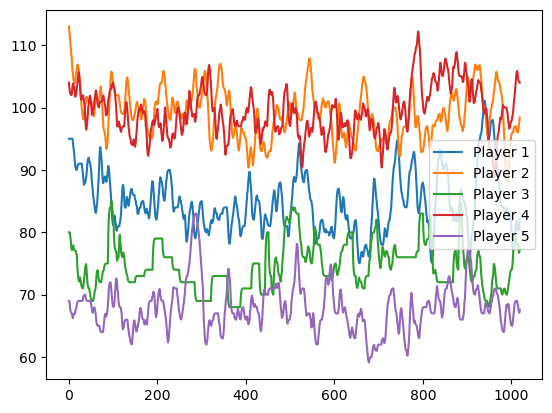

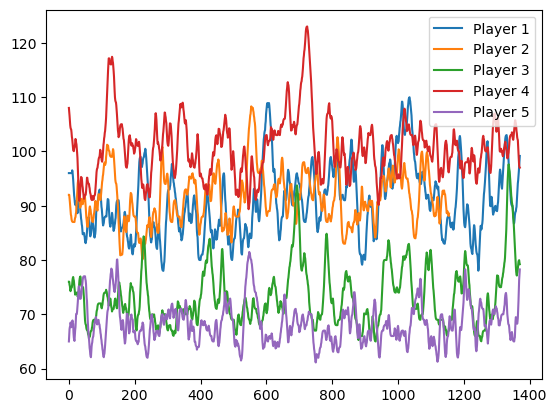

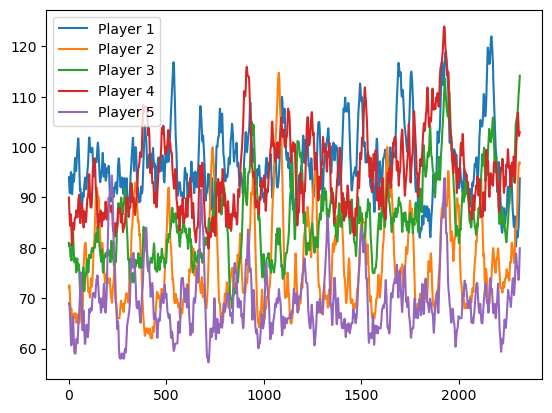

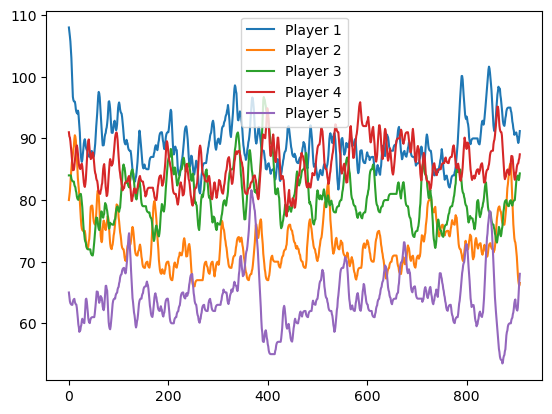

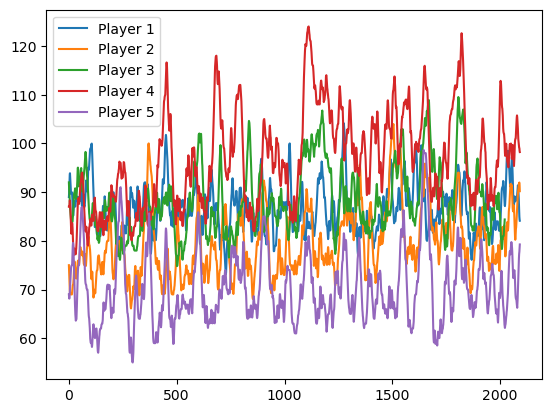

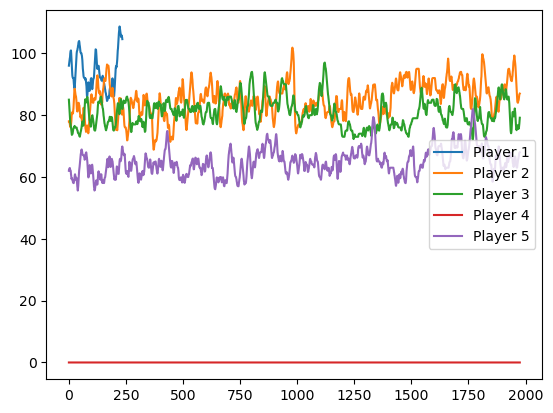

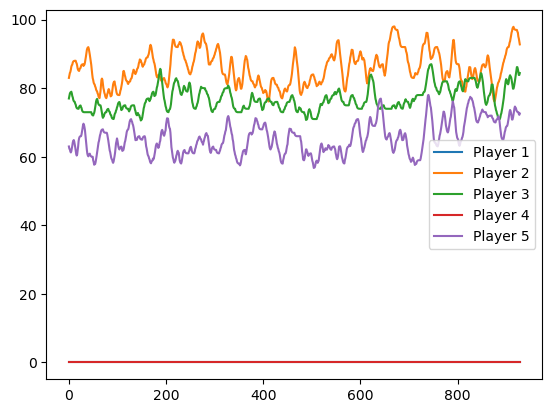

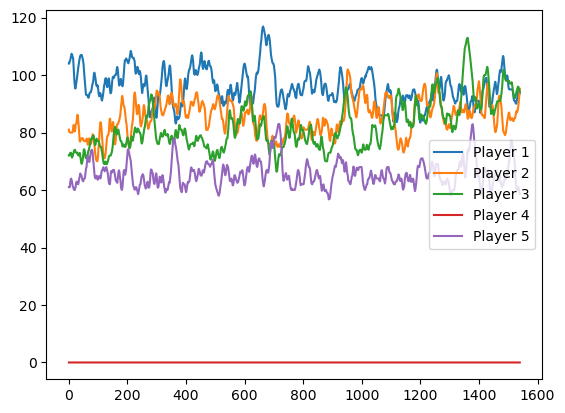

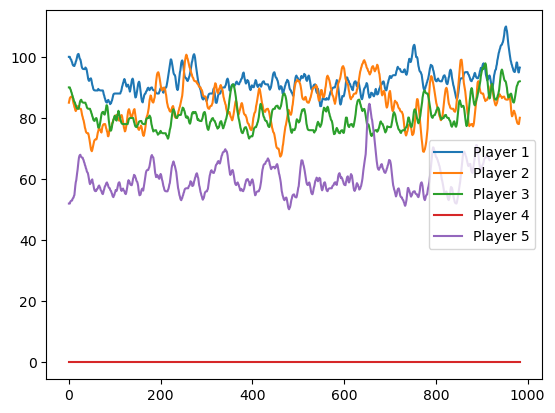

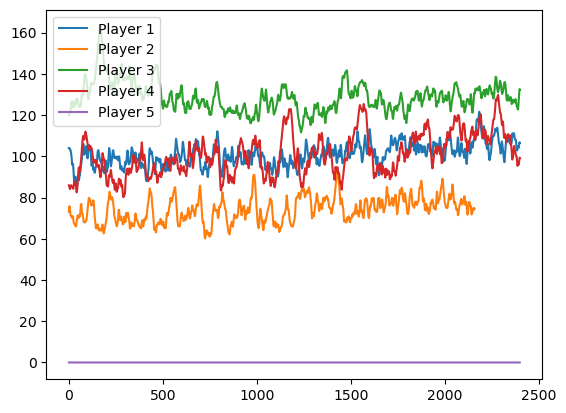

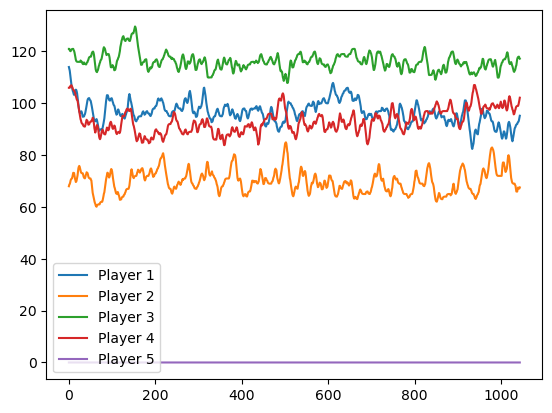

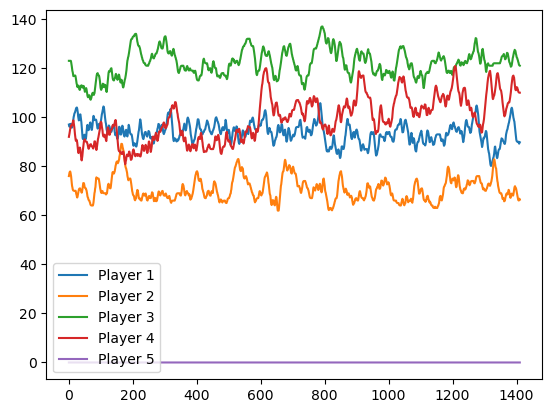

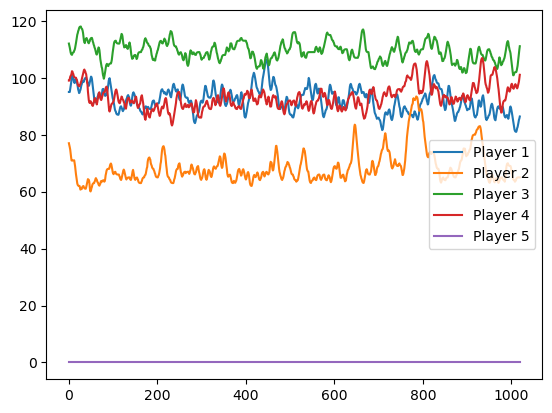

In [44]:
from os.path import exists

for matchnum in range(22):
    heart_rate = [[],[],[],[],[]]
    for playernum in range(5):
        path_to_file = './datas/matches/match_' + str(matchnum) + '/player_' + str(playernum) + "/heart_rate.csv"
        if (exists(path_to_file)):
            data = pd.read_csv(path_to_file)
            heart_rate[playernum] = data["heart_rate"]
        else:
            heart_rate[playernum] = 0
    s = pd.DataFrame({"Player 1" : heart_rate[0],
                      "Player 2" : heart_rate[1],
                      "Player 3" : heart_rate[2],
                      "Player 4" : heart_rate[3],
                      "Player 5" : heart_rate[4]})
    s.plot.line()

We can see the evolution of heart rate of players during each games.

Datas are simple, we have a timestamp and the heartrate at this given time so we can witness the evolution during the game.
This data seem to be important for later use.

## EMG

EMG are used to analyse nerves and muscles activities (here on both hands)

In [62]:
emg = pd.read_csv("./datas/matches/match_0/player_0/emg.csv")
emg

,time,emg_right_hand,emg_left_hand
0,0.0,15.358974,6.615385
1,1.0,20.135531,8.713065
2,2.0,19.110350,7.511174
3,3.0,15.918163,6.971881
4,4.0,13.031369,6.418652
...,...,...,...
952,952.0,8.085380,5.906658
953,953.0,7.847126,6.276716
954,954.0,7.030418,8.277068
955,955.0,5.859967,9.076840


Here, we have the data in match 0 for player 0 during the all game.

EMG is measured every second for both hands. We will have the possibility to correlate this to other data (events, win/loose...)

<AxesSubplot:>

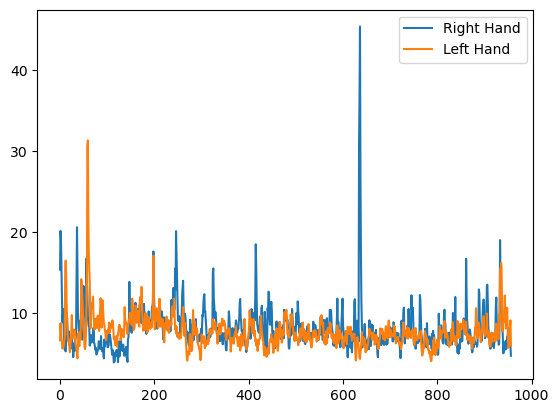

In [66]:
s = pd.DataFrame({"Right Hand" : emg["emg_right_hand"], "Left Hand" : emg["emg_left_hand"]})
s.plot.line()

Here again, we just retrieve player_0 match_0 data in order just to illustrate.

## Skin temperature

In [67]:
fst = pd.read_csv("./datas/matches/match_0/player_0/facial_skin_temperature.csv")
fst

,time,facial_skin_temperature
0,0.0,33.849000
1,1.0,33.839667
2,2.0,33.829000
3,3.0,33.817267
4,4.0,33.804742
...,...,...
952,952.0,34.388465
953,953.0,34.327677
954,954.0,34.256426
955,955.0,34.179942


<AxesSubplot:>

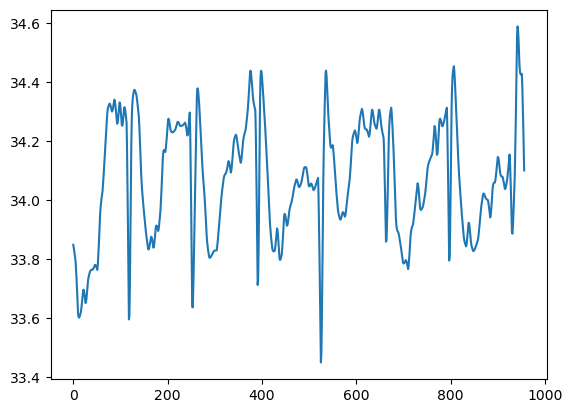

In [70]:
fst["facial_skin_temperature"].plot.line()

This graph shows variations in the facial skin temperature of the player during a game. We are representing the temperature (in degree) over time (in second).
This graph is to correlate with the room temperature graph that can provide some clues on the temperature changes but it can also provide us with some datas about player stress and focus or nervousness during the game.

## SPO2

SPO2 is the measurement of oxygeb saturation in the blood. This level needs to be between 97 and 100%. Having a high rate means that your muscles will have more oxygen delivered and will be more efficient.

This can sometimes also be correlated with altitude (SPO2 is decreasing after 1 600m of altitude) but here, given the previous measurements of the altitude arround 344m, this values aren't correlated that much.

In [72]:
spo2 = pd.read_csv("./datas/matches/match_0/player_0/spo2.csv")
spo2

,time,spo2
0,5.0,99.373746
1,6.0,98.966226
2,7.0,98.500489
3,8.0,97.988178
4,9.0,97.441312
...,...,...
943,948.0,98.033331
944,949.0,97.578684
945,950.0,97.099816
946,951.0,96.608836


<AxesSubplot:>

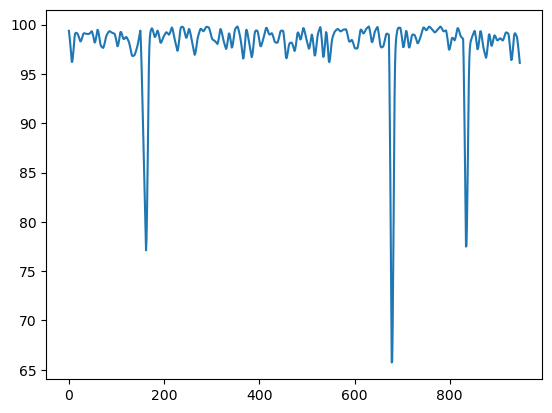

In [74]:
spo2["spo2"].plot.line()

We can see that player 0 looks healthy because he's spo2 rate is located in the good range. We probably can get rid of picks that lower he's rate arround 70% wich can be a sign of death and look at the evolution.

This may be correlated with some game events as well because the brain is saying to the body that their is an O2 need in the muscles to help the player achieve it's tasks and it can also be more relevant on the pro teams :

<AxesSubplot:>

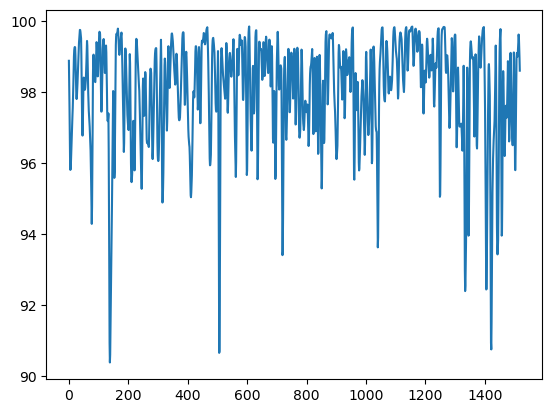

In [78]:
spo2 = pd.read_csv("./datas/matches/match_8/player_1/spo2.csv")
spo2
spo2["spo2"].plot.line()

## GSR

Last (but not least) we have measured GSR or galvanic skin response. It's basically the electrical activity measured on the surface of the skin. Those can witness the activity of the neural system in the body and can be usefull in the study of the brain / muscle interraction.

In [83]:
gsr = pd.read_csv("./datas/matches/match_0/player_1/gsr.csv")
gsr

,time,gsr
0,0.0,21335.372759
1,1.0,21352.527914
2,2.0,21422.867018
3,3.0,21448.504365
4,4.0,21272.140470
...,...,...
952,952.0,22147.031324
953,953.0,22436.920981
954,954.0,22719.283185
955,955.0,22934.830428


<AxesSubplot:>

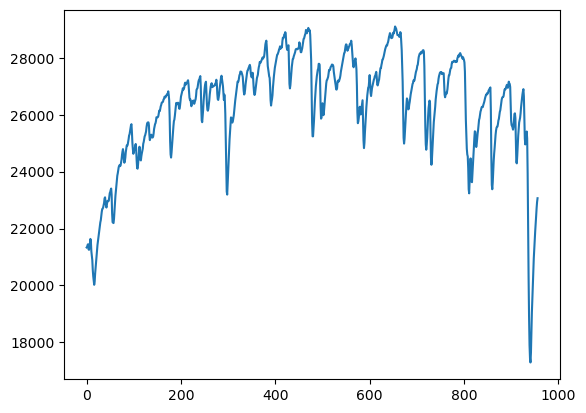

In [85]:
gsr["gsr"].plot.line()

## IMUs

IMU or Internal measurement unit are data regarding the movement of an object in space.

Here, we have a tracking for `left hand`, `right hand`, `chair seat` and `chair back`. All this data is used to understand the comportement of the player during a game.

As it is, data is not very graphic to be represented in a graph or even in a tab but can be usefull later on if we plug it to the correct data.